# MATH 210 Introduction to Mathematical Computing

## November 23, 2018

* Euler's method

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Euler's method

Most [differential equations](https://en.wikipedia.org/wiki/Differential_equation) are [impossible to solve](https://en.wikipedia.org/wiki/Navier%E2%80%93Stokes_existence_and_smoothness) explicitly. And so we use [numerical methods](https://en.wikipedia.org/wiki/Numerical_methods_for_ordinary_differential_equations) to approximate solutions. The simplest numerical method is [Euler's method](https://en.wikipedia.org/wiki/Euler_method). The procedure is simple. Let $y' = f(y,t)$ be a first order differential equation:

1. Start with an initial value $y(t_0)=y_0$.
2. Contruct the equation of the tangent line to the unknown function $y(t)$ at $t=t_0$: $y = y(t_0) + m(t - t_0)$ where the slope is $m = f(y_0,t_0)$.
3. Use the tangent line to approximate $y(t)$ at a small time step $t_1 = t_0 + h$: $y_1 = y_0 + f(y_0,t_0)(t_1 - t_0)$ where $y_1 \approx y(t_1)$.
4. Repeat up to a final time value $t_f$.

The formula for Euler's method defines a recursive sequence:

$$
y_{n+1} = y_n + f(y_n,t_n)(t_{n+1} - t_n) \ \ , \ \ y_0 = y(t_0)
$$

where $y_n \approx y(t_n)$ for each $n$. If we choose equally spaced $t$ and therefore the same time step $h = t_{n+1} - t_n$ then the formula becomes

$$
y_{n+1} = y_n + f(y_n,t_n)h \ \ , \ \ y_0 = y(t_0) \ , \ \ t_n = t_0 + nh 
$$

## Example

Let's implement Euler's method to approximate solutions of $y' = y$ for $t \in [0,2]$.

In [2]:
t0 = 0; tf = 2;
y0 = 1; h = 0.1;
t = np.arange(t0,tf,h)
y = np.zeros(len(t))
y[0] = y0
def f(y,t):
    return y
    
for n in range(0,len(t)-1):
    y[n+1] = y[n] + f(y[n],t[n])*h

We know the solution is $y(t) = e^t$ in this case and so we can compare the approximation by Euler's method to the tru solution.

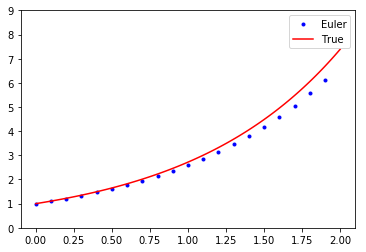

In [3]:
t_true = np.linspace(t0,tf,100)
y_true = np.exp(t_true)
plt.plot(t,y,'b.',t_true,y_true,'r-')
plt.legend(['Euler','True']), plt.ylim([0,9])
plt.show()

Note 2 important things:

1. The smaller the time step $h$ the better our approximation is.
2. A smaller time steo requires more computations!

## Example

Let's do an example where we know that it would be impossible to find the true solution. Let's approximate the solution of $y' = \sin(y^2)$ for each initial condition $y(0)=-3,-2.75,-2.5,...,2.5,2.75$ and plot all the results together.

Note that $y'=0$ when $y=\pm \sqrt{k \pi}$ for $k=0,1,2,3,4,...$. These points are called [equilibrium points](https://en.wikipedia.org/wiki/Equilibrium_point) of the equation and represent steady state (or constant) solutions.

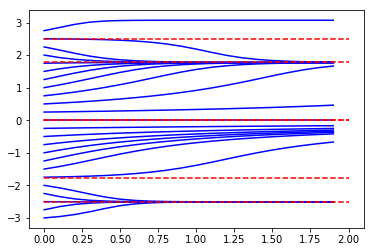

In [4]:
t0 = 0; tf = 2;
h = 0.1;
def f(y,t):
    return np.sin(y**2)
t = np.arange(t0,tf,h)

for alpha in np.arange(-3,3,0.25):
    y = np.zeros(len(t))
    y[0] = alpha
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + f(y[n],t[n])*h
    plt.plot(t,y,'b')

for k in range(0,3):
    y_eq = np.sqrt(k*np.pi)
    plt.plot([t0,tf],[y_eq,y_eq],'r--')
    plt.plot([t0,tf],[-y_eq,-y_eq],'r--')
    
plt.show()